$\textbf{Разделение на обучающую и тестовую выборки}$

Описание: Разделение данных на тренировочный набор для обучения и тестовый набор для оценки.

Преимущества: Простота и быстрая реализация.

Недостатки: Результаты могут зависеть от конкретного разделения данных.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def pipeStandSplit(X,Y):
    scaller = StandardScaler()
    X_scaller=scaller.fit_transform(X) 
    X_train,X_test,Y_train,Y_test=train_test_split(X_scaller,Y,test_size=0.2)
    return X_train,X_test,Y_train,Y_test

$\textbf{K-Fold Cross-Validation}$

Описание: Делит данные на k равных частей (folds), обучая модель на 𝑘−1
k−1 частях и тестируя на оставшейся. Процесс повторяется 𝑘 раз.

Преимущества: Уменьшает вероятность переобучения, так как модель тестируется на всех данных.

Недостатки: Вычислительно затратен для больших данных.


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kf)
print("Средняя оценка:", scores.mean())

$\textbf{Stratified K-Fold}$

Описание: Модификация K-Fold, сохраняющая пропорции классов в каждом разбиении.

Используется для: Несбалансированных данных.

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=skf)

$\textbf{Leave-One-Out Cross-Validation (LOOCV)}$

Описание: Каждый пример данных используется как тестовый, а остальные как обучающие.

Преимущества: Максимально использует данные для обучения.

Недостатки: Экстремально вычислительно затратен.

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=loo)

$\textbf{Time Series Split}$

Описание: Для временных рядов. Данные делятся на последовательные обучающие и тестовые наборы, соблюдая временную структуру.

Используется для: Временных рядов, где важно сохранить порядок данных.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(model, X, y, cv=tscv)

$\textbf{Holdout Validation}$

Описание: Данные делятся на три части: обучающую, валидационную и тестовую. Валидационная выборка используется для настройки гиперпараметров.

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


$\textbf{Nested Cross-Validation}$

Описание: Внешняя петля разделяет данные для оценки модели, а внутренняя петля ищет оптимальные гиперпараметры.

Используется для: Оценки производительности модели с гиперпараметрами.

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {'param': [1, 10, 100]}
grid = GridSearchCV(model, param_grid, cv=3)
nested_scores = cross_val_score(grid, X, y, cv=5)


$\textbf{Bootstrapping}$

Описание: Генерация нескольких обучающих наборов с заменой для оценки модели.

Преимущества: Хорошо работает на небольших наборах данных.

In [ ]:
from sklearn.utils import resample
for _ in range(100):
    X_resampled, y_resampled = resample(X, y)
    model.fit(X_resampled, y_resampled)


$\textbf{Monte Carlo Cross-Validation}$

Описание: Многократное случайное разделение данных на тренировочные и тестовые наборы.

Преимущества: Подходит для оценки производительности.

In [ ]:
for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)


$\textbf{SHAP}$(SHapley Additive exPlanations)

c:\Users\JACK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

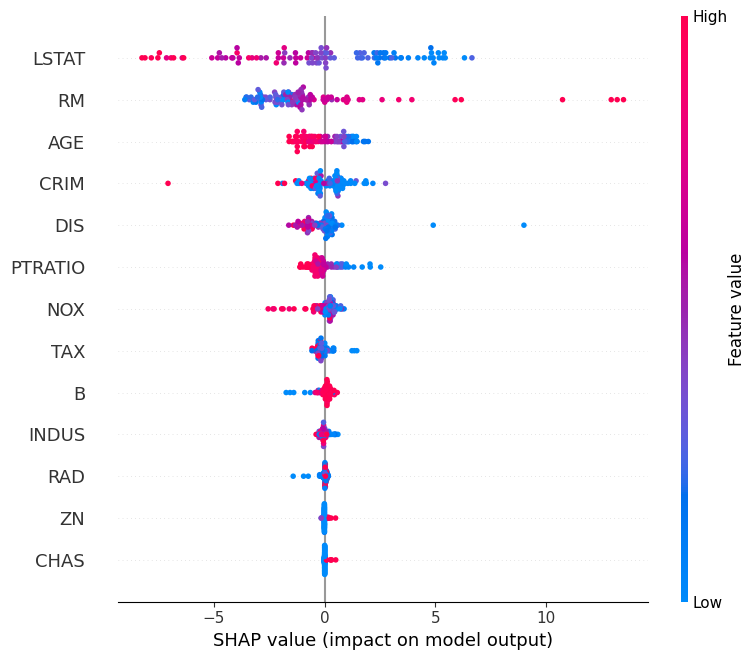

In [1]:
import shap
import xgboost
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

# Загрузка данных
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

# Создание объекта объяснителя SHAP
explainer = shap.Explainer(model, X_train)

# Расчет значений SHAP для тестового набора
shap_values = explainer(X_test)

# Визуализация Summary Plot
shap.summary_plot(shap_values, X_test)


Force Plot (локальное объяснение для одного предсказания):

In [3]:
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])


 Dependence Plot (влияние отдельного признака):

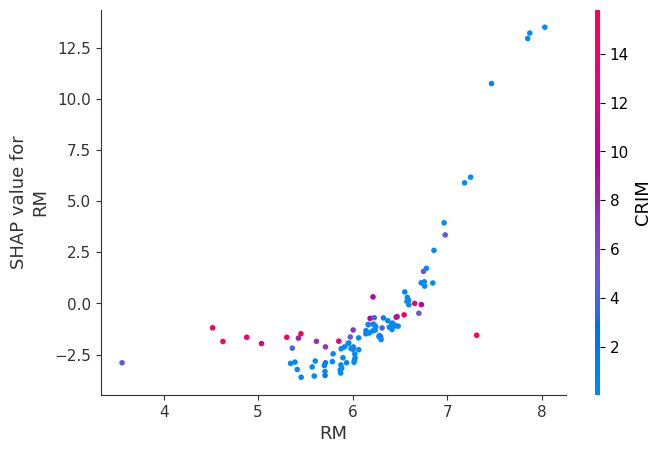

In [4]:
shap.dependence_plot("RM", shap_values.values, X_test)


Feature Importance:

In [ ]:
shap.plots.bar(shap_values)


На представленном графике `SHAP summary plot` визуализируется влияние каждого признака на предсказания модели. Вот как его интерпретировать:

---

### Основные элементы графика:
1. **Признаки**:  
   По вертикальной оси перечислены все признаки (например, `LSTAT`, `RM`, `AGE` и т.д.), упорядоченные по их важности для модели.  
   Чем выше признак в списке, тем больше он влияет на предсказания.

2. **SHAP value (impact on model output)**:  
   Значения по горизонтальной оси показывают, насколько сильно данный признак повлиял на предсказание.  
   - **Положительные значения**: Признак увеличивает предсказание.  
   - **Отрицательные значения**: Признак уменьшает предсказание.  
   Пример: Если модель прогнозирует стоимость жилья, то положительный вклад увеличивает стоимость, а отрицательный — уменьшает.

3. **Цветовые точки**:  
   Каждая точка представляет одно наблюдение (строку данных).  
   - **Цвет точки**: Указывает значение признака (синий = низкое значение, красный = высокое значение).  
   Например, для признака `LSTAT` (процент низкого социального статуса населения):
   - Высокие значения (красный) увеличивают отрицательный вклад, что логично — низкий статус населения обычно снижает цену жилья.

4. **Разброс точек**:  
   Ширина разброса точек по горизонтали показывает, насколько сильно значение признака влияет на предсказания.  
   - Если точки сильно разбросаны, это указывает на высокую вариативность влияния признака.

---

### Чтение графика:
#### 1. **Какие признаки наиболее важны?**  
   - Признаки в верхней части (`LSTAT`, `RM`, `AGE`) оказывают наибольшее влияние на предсказания.  
   - Например, `LSTAT` (процент низкостатусного населения) имеет большой отрицательный вклад.

#### 2. **Как признаки влияют?**  
   - Для `RM` (среднее количество комнат в доме):  
     - Высокие значения (красный) увеличивают предсказание (цена жилья растет с числом комнат).
   - Для `AGE` (возраст зданий):  
     - Высокие значения (красный) имеют положительное влияние, но слабее.

#### 3. **Взаимодействие признаков**:  
   - Признаки с широким разбросом по горизонтали сильно зависят от других факторов. Например, влияние `LSTAT` варьируется от -5 до 0, что говорит о его сложной зависимости от других переменных.

---

### Вывод:
- **Основные признаки**: `LSTAT` и `RM` оказывают самое значительное влияние на модель.
- **Интуитивные выводы**: Высокие значения `RM` увеличивают предсказание, а высокие значения `LSTAT` уменьшают.
- **Применение**: Эти данные могут быть использованы для улучшения модели, отбора признаков или объяснения результатов.